# Decision Trees Lab

In this lab we will discover how to apply decision trees to regression and classification problems.

### 1: Build a regression tree

How do you build a decision tree? You're going to find out by building one in pairs!

Your training data is a tiny dataset of [used vehicle sale prices](../../assets/datasets/used_cars.csv). Your goal is to predict Price for out-of-sample data. Here are your instructions:

1. Read the data into Pandas.
- Decide which feature is the most important predictor, and use that to make your first split. (Only binary splits are allowed!)
- After making your first split, you should actually split your data in Pandas into two parts, and then explore each part to figure out what other splits to make.
- Decide if you need additional splits along other features
- Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting. (As always, your goal is to build a model that generalizes well!)
- You are allowed to split on the same variable multiple times!
- Draw your tree on a piece of paper, making sure to label your leaves with the mean Price for the observations in that "bucket".
- When you're finished, review your tree to make sure nothing is backwards. (Remember: follow the left branch if the rule is true, and follow the right branch if the rule is false.)

In [4]:
import pandas as pd
import seaborn as sns
%matplotlib inline

/Users/johnnosal/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
uc = pd.read_csv('./used_cars.csv')

In [6]:
uc

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


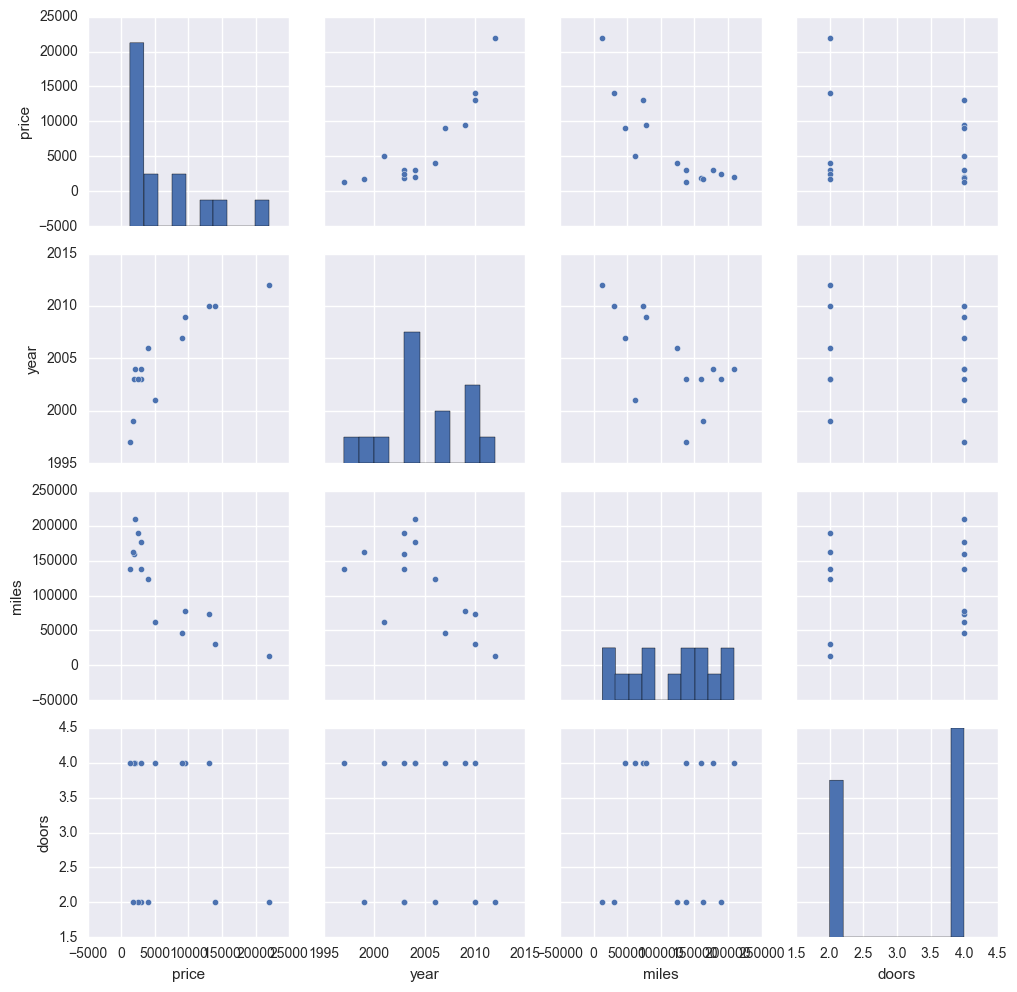

In [7]:
sns.pairplot(uc);

In [8]:
uc2 = uc[0:5]
uc3 = uc[5:]


In [9]:
uc3.reset_index(drop=True)

,price,year,miles,doors,type
0,4000,2006,124000,2,car
1,3000,2004,177000,4,car
2,2000,2004,209000,4,truck
3,3000,2003,138000,2,car
4,1900,2003,160000,4,car
5,2500,2003,190000,2,truck
6,5000,2001,62000,4,car
7,1800,1999,163000,2,truck
8,1300,1997,138000,4,car


In [10]:
uc2

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


#### How does a computer build a regression tree?

The ideal approach would be for the computer to consider every possible partition of the feature space. However, this is computationally infeasible, so instead an approach is used called **recursive binary splitting:**

- Begin at the top of the tree.
- For every single predictor, examine every possible cutpoint, and choose the predictor and cutpoint such that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
- Repeat the examination for the two resulting regions, and again make a single split (in one of the regions) to minimize the MSE.
- Keep repeating this process until a stopping criteria is met.

**How does it know when to stop?**

1. We could define a stopping criterion, such as a **maximum depth** of the tree or the **minimum number of samples in the leaf**.
2. We could grow the tree deep, and then "prune" it back using a method such as "cost complexity pruning" (aka "weakest link pruning").

Method 2 involves setting a tuning parameter that penalizes the tree for having too many leaves. As the parameter is increased, branches automatically get pruned from the tree, resulting in smaller and smaller trees. The tuning parameter can be selected through cross-validation.

Note: **Method 2 is not currently supported by scikit-learn**, and so we will use Method 1 instead.


In [11]:
uc


,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [12]:
uc['type'] = uc['type'].replace('car', 1)
uc['type'] = uc['type'].replace('truck', 0)

In [13]:
uc

,price,year,miles,doors,type
0,22000,2012,13000,2,1
1,14000,2010,30000,2,1
2,13000,2010,73500,4,1
3,9500,2009,78000,4,1
4,9000,2007,47000,4,1
5,4000,2006,124000,2,1
6,3000,2004,177000,4,1
7,2000,2004,209000,4,0
8,3000,2003,138000,2,1
9,1900,2003,160000,4,1


### 2: Build a regression tree in scikit-learn

Building a tree by hand was not so easy, and also not ideal. Let's use scikit-learn to build an optimal regression tree. Do the following:

- Map the `type` column to a binary variable
- Create a matrix `X` that contains the feature values and a vector `y` that contains the price values
- Split the data into train-test using a random state of 42 and test_size of 30% - you can use sklearn train_test_split
- Import and initialize the `DecisionTreeRegressor` class from scikit-learn
- Fit it to the training set
- Predict the values of the test set
- Display the predicted and actual values in a plot
- Use r2_score to judge the goodness of the regression

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [15]:
X = uc.drop('price', axis=1)

In [16]:
y = uc['price']
y

0     22000
1     14000
2     13000
3      9500
4      9000
5      4000
6      3000
7      2000
8      3000
9      1900
10     2500
11     5000
12     1800
13     1300
Name: price, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_train, X_test, y_train, y_test

(    year   miles  doors  type
 8   2003  138000      2     1
 2   2010   73500      4     1
 1   2010   30000      2     1
 13  1997  138000      4     1
 4   2007   47000      4     1
 7   2004  209000      4     0
 10  2003  190000      2     0
 3   2009   78000      4     1
 6   2004  177000      4     1,     year   miles  doors  type
 9   2003  160000      4     1
 11  2001   62000      4     1
 0   2012   13000      2     1
 12  1999  163000      2     0
 5   2006  124000      2     1, 8      3000
 2     13000
 1     14000
 13     1300
 4      9000
 7      2000
 10     2500
 3      9500
 6      3000
 Name: price, dtype: int64, 9      1900
 11     5000
 0     22000
 12     1800
 5      4000
 Name: price, dtype: int64)

In [75]:
par = RandomForestClassifier(random_state = 1)

In [76]:
par.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [77]:
y_1 = par.predict(X_test)
y_1

array([ 3000,  9000, 14000,  2500,  9000])

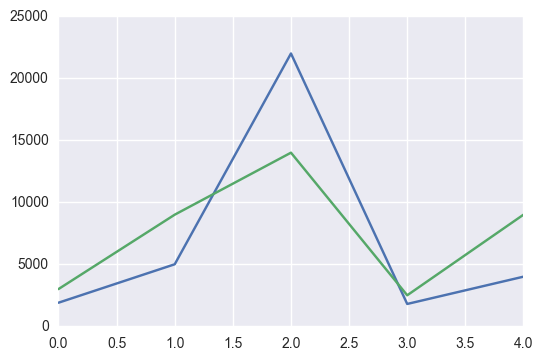

In [78]:
plt.plot(y_test.values)
plt.plot(y_1)

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2_score(y_test, y_1)

0.63337364963303

### 3.b Global parameters

The `DecisionTreeRegressor` offers few global parameters that can be changed at initialization. For example one can set the `max_depth` or the `min_samples_leaf` parameters and impose global constraints on the space of solutions.

1. Use `cross_val_score` with 3-fold cross validation to find the optimal value for the `max_depth` (explore values 1 - 10). Note that you will have to set `scoring='mean_squared_error'` as criterion for score. Always set `random_state=1`
- Plot the error as a function of `max_depth`

In [73]:
from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [82]:
scoreList = {}

for i in range(1,10):
    tree = RandomForestClassifier(max_depth = i, random_state = 1)
    score = cross_val_score(tree, X, y)
    score2 = np.mean(np.sqrt(-score))
    scoreList[i] = score2

print min(zip(scoreList.values(), scoreList.keys()))

plt.plot(scoreList.values());
plt.xlim(1,8);

ValueError: All the n_labels for individual classes are less than 3 folds.

### Exercise 4: Use GridSearchCV to find te best Regression Tree

How do we know by pruning with max depth is the best model for us? Trees offer a variety of ways to pre-prune (that is, we tell a computer how to design the resulting tree with certain "gotchas").

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

1. Initialize reasonable ranges for all parameters and find the optimal combination using Grid Search.

In [63]:
params = {'max_depth': [2,3,4,5,6], 'max_features': [2,3,4,5,6], 'max_leaf_nodes': [2,3], 'min_samples_leaf': [2,3,4], 'min_samples_split': [2,3,4]}


In [58]:
from sklearn.model_selection import GridSearchCV

In [83]:
tree2 = RandomForestClassifier()
GScv = GridSearchCV(tree2, params, scoring='mean_squared_error', verbose=True, n_jobs=-1)


GScv.fit(X, y)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


ValueError: All the n_groups for individual classes are less than n_splits=3.

## 4 Classification trees

Classification trees are very similar to regression trees. Here is a quick comparison:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a different criterion (discussed below)|

Note that classification trees easily handle **more than two response classes**! (How have other classification models we've seen handled this scenario?)



### 4.a Building a classification tree in scikit-learn
We'll build a classification tree using the [Car Dataset](./assets/datasets/cars.csv).

- Load the dataset in pandas
- Check for missing values
- Encode all the categorical features to booleans using `pd.get_dummies`
- Encode the labels using LabelEncoder
- Split X and y with train_test split like above
        train_test_split(X, y, test_size=0.3, random_state=42)
- Fit a classification tree with `max_depth=3` on all data
- Compute and display the confusion matrix
- Release the constraint of `max_depth=3` and see if the classification improves

In [65]:
cars = pd.read_csv('./cars.csv')

In [66]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [69]:
cars.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [70]:
pd.get_dummies(cars.drop('acceptability', axis=1))

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
